In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display
import sys
import os
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(0,'../src')
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

logger = logging.getLogger("feat_viz")
logging.basicConfig(format='[%(name)s %(levelname)s] %(message)s', level=logging.INFO)

# Read the raw gene expresison data (UMI count)

In [2]:
dat_dir = "/share/PI/sabatti/sc_data/intestine2k"
raw_dat = pd.read_table(os.path.join(dat_dir, "table_B_scRNAseq_UMI_counts.tsv"), delimiter="\t")
raw_dat = raw_dat.set_index("gene").T # load the gene expression
raw_dat.columns.names = [None]
raw_dat.index.names = ["cell_id"]
print(raw_dat.shape)
raw_dat.head()

(1383, 27998)


,Xkr4,Gm1992,Gm37381,Rp1,Rp1.1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,PISD,DHRSX,Vmn2r122,CAAA01147332.1
cell_id,,,,,,,,,,,,,,,,,,,,,
AAACGGGTCACTGGGC,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
AAAGATGGTTCGGGCT,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
AAAGCAACATGGTCAT,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,1,2,0,0
AAAGTAGGTTGTGGAG,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
AACCGCGCAAGCGTAG,0,0,0,0,0,0,0,2,1,0,...,0,0,0,0,0,0,1,0,0,0


# Read the cell meta-information (t-SNE, zonation)

Note: the cell ids do not match - probably a bug from the paper (but things look ok when in order...)

In [4]:
cell_df = pd.read_table(os.path.join(dat_dir, "table_C_scRNAseq_tsne_coordinates_zones.tsv"), delimiter="\t")
cell_df = cell_df.set_index("cell_id")
cell_df.head()
# expr_df = cell_df.join(raw_dat, on="cell_id") 

,tSNE_coordinate_1,tSNE_coordinate_2,zone
cell_id,,,
AAACCTGGTAAGTTCC,12.518369,-16.735935,V3
AAACGGGCACCAACCG,-3.619842,-5.642620,V5
AAACGGGTCACTGGGC,13.622892,16.828087,V1
AAAGATGGTGGACGAT,15.653014,3.311508,V2
AAAGATGGTTCGGGCT,6.754220,20.791256,V1


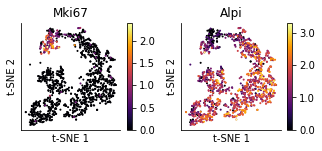

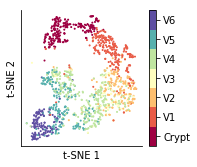

In [5]:
from plot_utils import plot_scatter_continuous, plot_scatter_discrete

def adjust_xy_labels(ax, xy_labels=("t-SNE 1", "t-SNE 2")):
    ax.set_xlabel(xy_labels[0])
    ax.set_ylabel(xy_labels[1])
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

def plot_multi_gene_scatter(gene_df, proj):
    genes = list(gene_df.columns)
    n_cols = 8
    n_cols = min(len(genes),n_cols)
    n_rows = int(np.ceil(len(genes) / n_cols))
    # logger.info("Plotting genes: {}".format(genes))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(2.3*n_cols, 0.3+1.9*n_rows))
    for i_row in range(n_rows):
        for i_col in range(n_cols):
            if n_rows == 1:
                if n_cols == 1:
                    ax = axes
                else:
                    ax = axes[i_col]
            else:
                ax = axes[i_row, i_col]
            i_gene = n_cols * i_row + i_col
            if i_gene >= len(genes):
                ax.axis('off')
            else:
                gene = genes[i_gene]
                vals = gene_df[gene]
                plot_scatter_continuous(proj, vals, ax, ms=1)
                ax.set_title(gene)
                adjust_xy_labels(ax)
    plt.tight_layout()
    plt.show()
proj = cell_df[["tSNE_coordinate_1", "tSNE_coordinate_2"]]
plot_multi_gene_scatter(raw_dat[["Mki67", "Alpi"]], proj)
# plot discrete zonation labels
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2.5))
plot_scatter_discrete(proj, cell_df["zone"], ax, ms=1)
adjust_xy_labels(ax)
plt.show()

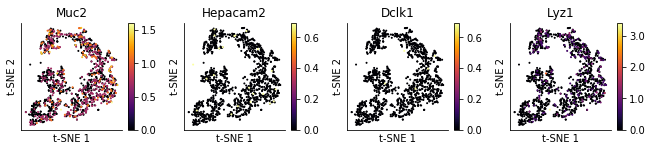

In [6]:
cell_t_genes = ["Muc2", "Hepacam2", "Dclk1", "Lyz1"]
plot_multi_gene_scatter(raw_dat[cell_t_genes], proj)

# Read the genes of interest

In [7]:
smFISH_genes = pd.read_table(os.path.join(dat_dir, "extracted", "smFISH_genes.csv"), header=None)
smFISH_genes = set(smFISH_genes[0])
logger.info("Loaded {} smFISH genes".format(len(smFISH_genes)))
smFISH_genes = list(smFISH_genes.intersection(set(raw_dat.columns)))
logger.info("Intersect {} smFISH genes".format(len(smFISH_genes)))
print(smFISH_genes)

[feat_viz INFO] Loaded 23 smFISH genes
[feat_viz INFO] Intersect 22 smFISH genes


['Nlrp6', 'Malat1', 'Rpl4', 'Ada', 'Slc5a1', 'Reg3g', 'Reg1', 'Rpl3', 'Cdh1', 'Pigr', 'Gstm3', 'Slc2a2', 'Apoa1', 'Klf4', 'Nt5e', 'Slc28a2', 'Fos', 'Neat1', 'Cps1', 'Apob', 'Enpep', 'Junb']


In [8]:
rna_df = pd.read_table(os.path.join(dat_dir, "extracted", "RNAseq_gene_summary.csv"), delimiter=",")
logger.info("Loaded {} genes".format(rna_df.shape[0]))
threshold = 1e-3
rna_df = rna_df.loc[(rna_df.m > threshold) & (rna_df.gene_name.isin(raw_dat.columns))]
logger.info("Kept {} genes with max expr > {} ".format(rna_df.shape[0], threshold))
# top genes
high_thres = 3.5
high_zone = 5
high_rna_df = rna_df.loc[(rna_df.com > high_thres) & (rna_df.mx == high_zone)]
logger.info("Kept {} high zone genes with geom avg > {} ".format(high_rna_df.shape[0], high_thres))
high_genes = list(high_rna_df.gene_name)
print(high_genes)
# bottom genes
low_thres = 2.5
low_zone = 1
low_rna_df = rna_df.loc[(rna_df.com < low_thres) & (rna_df.mx == low_zone)]
logger.info("Kept {} low zone genes with geom avg < {} ".format(low_rna_df.shape[0], low_zone))
low_genes = list(low_rna_df.gene_name)
print(low_genes)

[feat_viz INFO] Loaded 453 genes
[feat_viz INFO] Kept 232 genes with max expr > 0.001 
[feat_viz INFO] Kept 43 high zone genes with geom avg > 3.5 
[feat_viz INFO] Kept 62 low zone genes with geom avg < 1 


['S100a6', 'Ifrd1', 'Rab34', 'Ssbp2', 'Ada', 'Pmp22', 'Cldn7', 'Slc25a22', 'Pkib', 'Tbk1', 'Fgd4', 'Pam', 'Slc28a2', 'Psma7', 'Acad9', 'Lrrc41', 'Chek2', 'Mrpl48', 'Myo7a', 'Ap1g1', 'Cfap20', 'Cep57', 'Apoa4', 'Apoc3', 'Ythdc2', 'Krt20', 'Zfp280d', 'Gcn1l1', 'S100a10', 'Serpinb1a', 'Tlr1', 'Slc17a5', 'Tmsb4x', 'Lgals3', 'Glipr1', 'Olfr1385', '2010109I03Rik', 'Chchd1', 'Clca4a', 'Sprr2a2', 'Gm10680', 'Olfr46', 'Gm20594']
['Cox5a', 'Ckmt1', 'Rplp1', 'Rps18', 'Lypd8', 'Cox6c', 'Atp5e', 'Ndufa1', 'Atp5g3', 'Tm4sf5', 'Uqcr11', '2010107E04Rik', 'Atp5j', 'Atp5o', 'Ndufa5', 'Ccl25', 'Rps14', 'Ndufb8', 'Atp5a1', 'Sis', 'Txn1', 'Spink4', 'Plac8', 'Ndufa4', 'Reg3g', 'Cox7b', 'Cox4i1', 'Cox7a2', 'Atp5h', 'Rps29', 'Cox6b1', 'Rps27l', '2210407C18Rik', 'Ndufc1', 'Atp5j2', 'Atp5l', 'Gpx2', 'Rps2', 'Uqcrq', 'Rps8', 'Chchd10', 'Minos1', 'Lgals4', 'Fabp1', 'Atpif1', 'Rpl38', 'Rpl18', 'Uqcr10', 'Rpl35a', 'Cox5b', 'Rps12', 'Uqcrh', 'Rps28', 'Ndufb6', 'Reg3b', 'Gsta1', 'Cox7a1', 'Rpl39', 'Uba52', 'Rps27', '

In [9]:
print(len(set(smFISH_genes).intersection(set(high_genes))))
print(len(set(smFISH_genes).intersection(set(low_genes))))

2
1


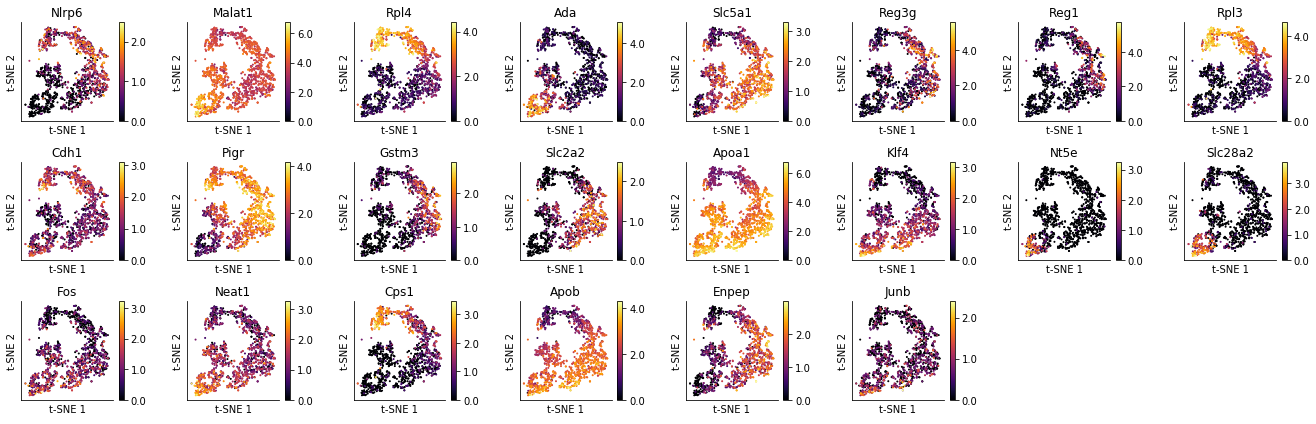

In [10]:
plot_multi_gene_scatter(raw_dat[smFISH_genes], proj)

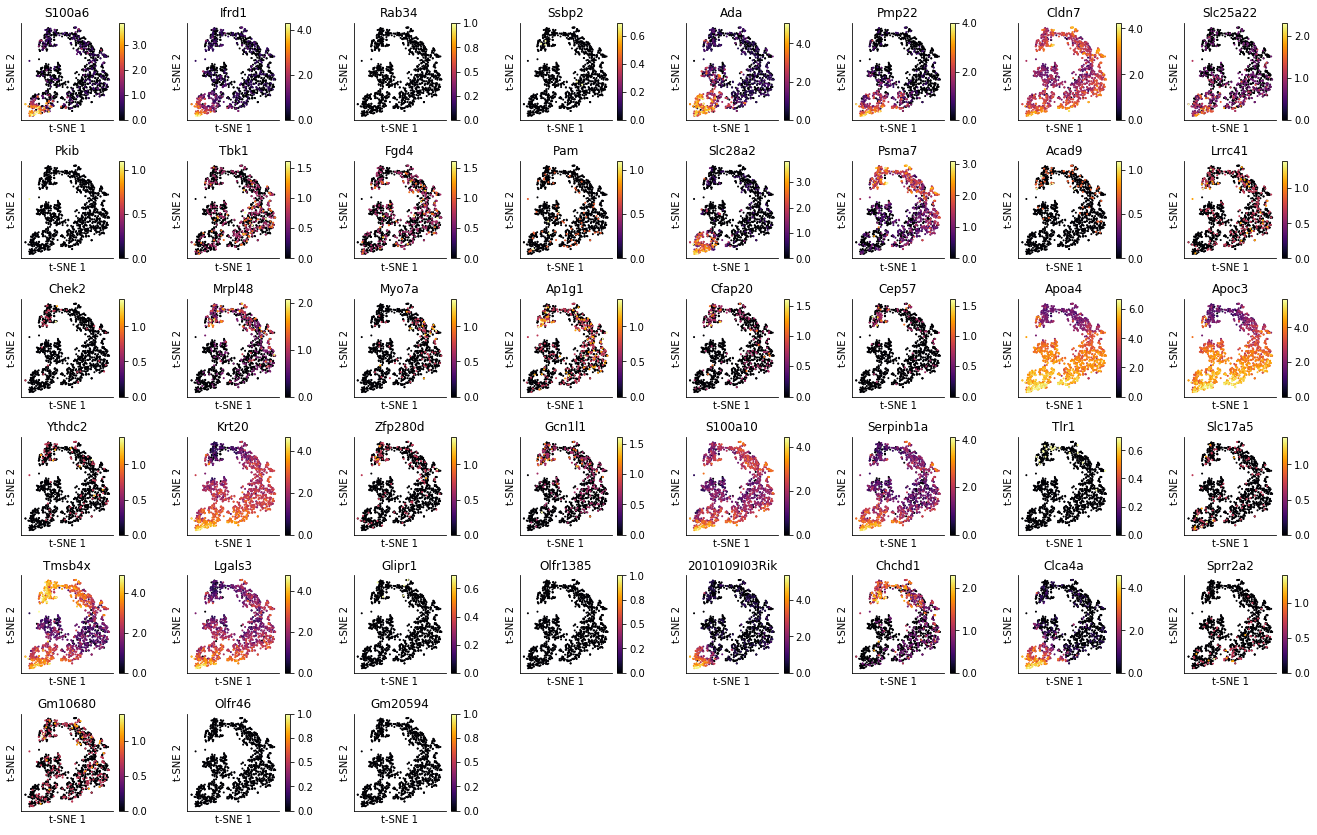

In [11]:
plot_multi_gene_scatter(raw_dat[high_genes], proj)

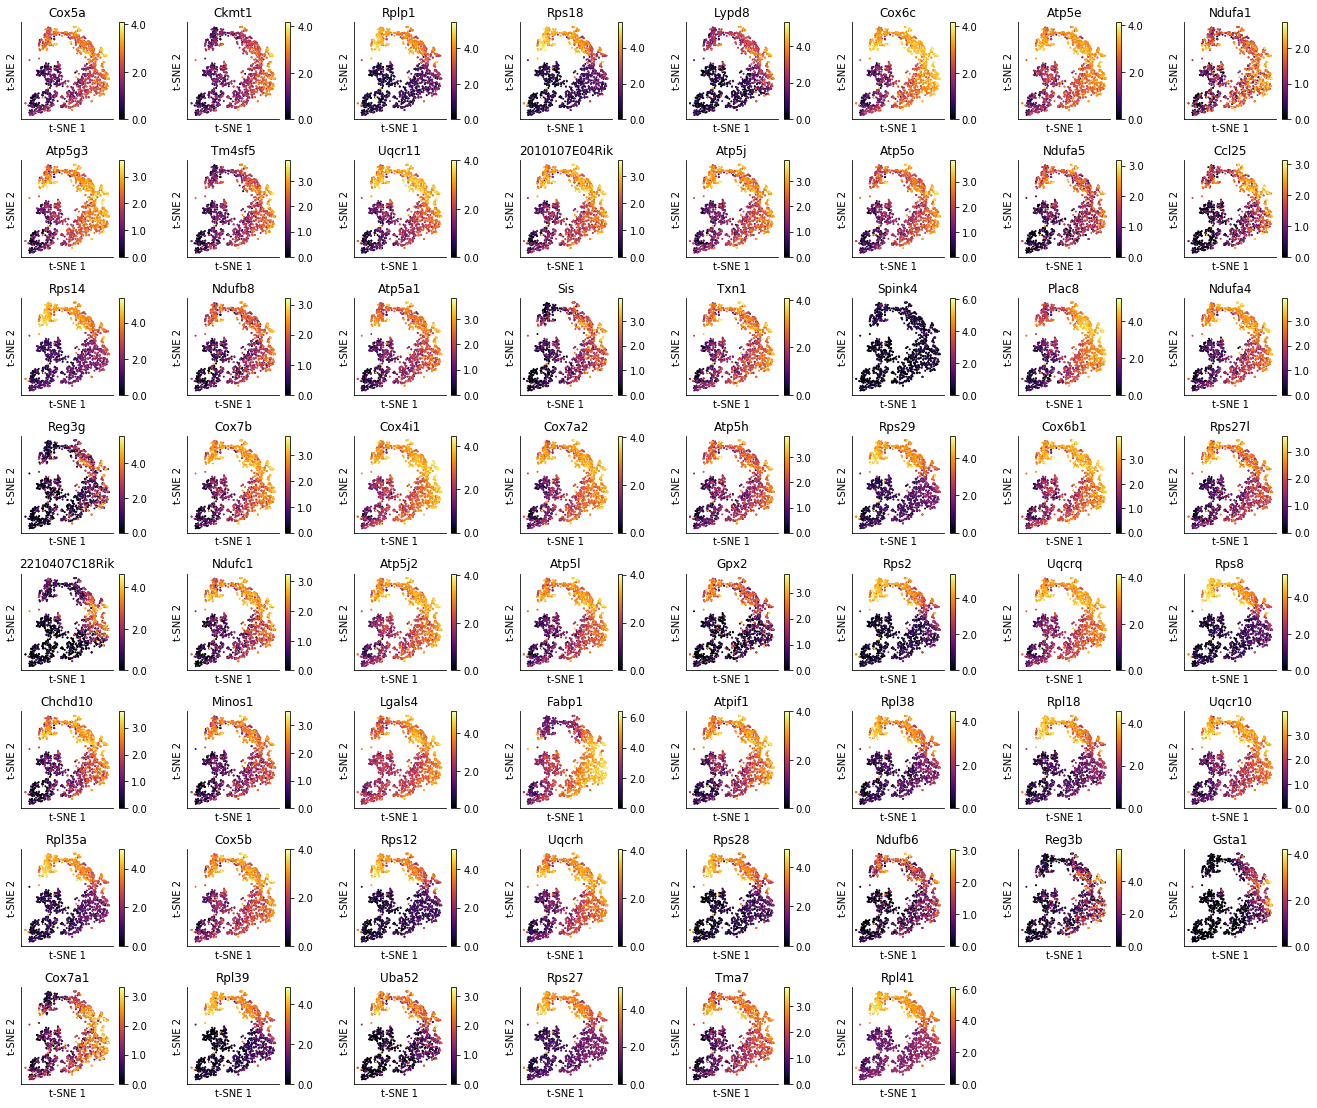

In [12]:
plot_multi_gene_scatter(raw_dat[low_genes], proj)

In [3]:
import scanpy.api as sc
from anndata import AnnData, read_h5ad

def get_ann_data(dat, verbose = True):
    adata = AnnData(dat.T.values)
    adata.obs_names = np.array(dat.columns)
    adata.var_names = np.array(dat.index)
    # adata.raw.obs_names = adata.obs_names
    # adata.raw.var_names = adata.var_names
    adata.var['gene_ids'] = dat.index
    adata.var_names_make_unique()
    if verbose:
        sc.pl.highest_expr_genes(adata, n_top=10)

    # filter out zero genes
    sc.pp.filter_cells(adata, min_genes=200)
    adata.raw = adata.copy()
    sc.pp.filter_genes(adata, min_cells=10)
    adata.obs['n_counts'] = adata.X.sum(axis=1)
    if verbose:
        sc.pl.violin(adata, ['n_genes', 'n_counts'], jitter=0.4, multi_panel=True)
        nz_genes = len(adata.var['gene_ids'])
        print("Filtered out: {} genes; remaining {}".format(len(dat.index) - nz_genes, nz_genes))
    return adata

# filter cells with too many counts (potential doublets)
# cell_sel = adata.obs['n_genes'] < 5000
# adata = adata[cell_sel, :]
# if verbose:
#     print("Filtered out: {} doublet cells".format(np.sum(np.logical_not(cell_sel))))
#     print(adata)